In [1]:
import pandas as pd
from pandas import DataFrame
import pickle
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
%matplotlib inline

/home/drcjar/.virtualenvs/litsearch2/lib/python3.5/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
/home/drcjar/.virtualenvs/litsearch2/lib/python3.5/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
df = pd.read_pickle('.././data/pickle/pypf_prep.pkl') # load data

In [44]:
df = df[df['Agegroup'] != 'ALL AGES'] # lets throw away all ages rows 

agemidpoint = {'ALL AGES': 100, 'UNDER 25': 20, '25-34':30, '35-44':40, 
               '45-54':50, '55-64':60, '65-74':70, '75-84':80, '85+':90}

df['Agemidpoint'] = df.Agegroup.map(lambda x: agemidpoint.get(x)) # lets give everyone an age mid point
df['YearOfDeath'] = df.Year.map(lambda x: x.year)
df['dob'] = df['YearOfDeath'] - df['Agemidpoint'] # dob is appoximately year of death - age midpoint
df['birthcohort'] = pd.cut(df.dob, [1880, 1890, 1900, 1910, 1920, 1930, 
                                    1940, 1950, 1960, 1970, 1980, 1990, 2000], 
                           labels=['1880-1890', '1890-1900', '1900-1910', '1910-1920', 
                                   '1920-1930','1930-1940','1940-1950','1950-1960',
                                   '1960-1970', '1970-1980', '1980-1990', '1990-2000']) # add birth cohorts

In [104]:
mask = {}
mask['male-ipf-cohort'] = eval("(df['Sex'] == 'Male') & (df['Cause'] == 'IPF') & (df['birthcohort'] < '1980-1990')")
mask['male-meso-cohort'] = eval("(df['Sex'] == 'Male') & (df['Cause'] == 'All Mesothelioma') & (df['birthcohort'] < '1980-1990')")


def plot_cohort_year(df, mask, title):
    cohort_data = {}

    df = df[mask]
    
    for cohort in df['birthcohort'].unique():
        grp = df[df['birthcohort'] == cohort].groupby('Year')
        cohort_data[cohort] = grp['Estimated deaths age standardised to 2008 population'].sum()
        
    pd.DataFrame(cohort_data).plot(figsize=(7,7), title=title)
    
def plot_cohort_age(df, mask, title):
    cohort_data = {}

    df = df[mask]
    
    for cohort in df['birthcohort'].unique():
        grp = df[df['birthcohort'] == cohort].groupby('Agemidpoint')
        cohort_data[cohort] = grp['Estimated deaths age standardised to 2008 population'].sum()
        
    pd.DataFrame(cohort_data).plot(figsize=(7,7), title=title)

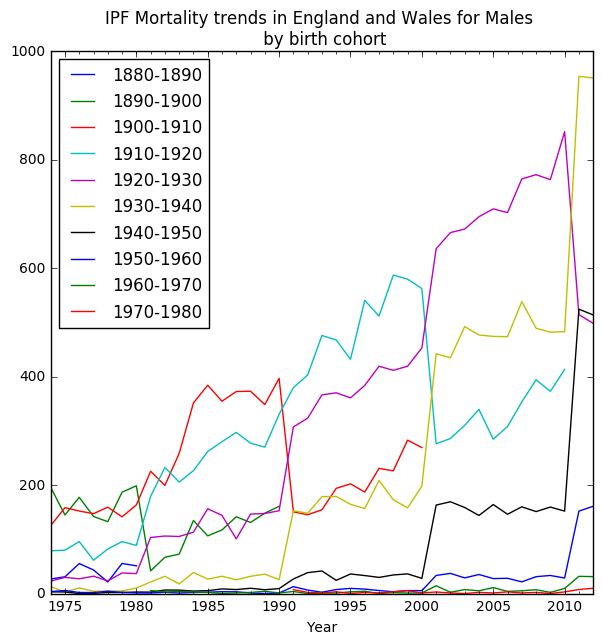

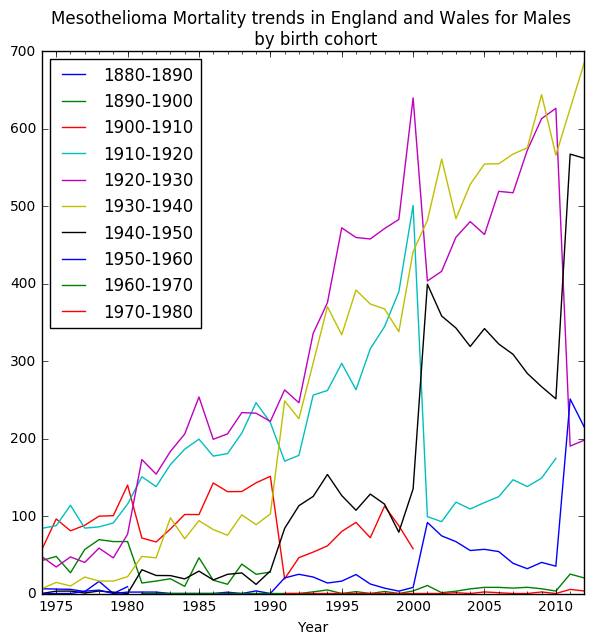

In [106]:
plot_cohort_year(df, mask['male-ipf-cohort'], 'IPF Mortality trends in England and Wales for Males \n by birth cohort')
plot_cohort_year(df, mask['male-meso-cohort'], 'Mesothelioma Mortality trends in England and Wales for Males \n by birth cohort')

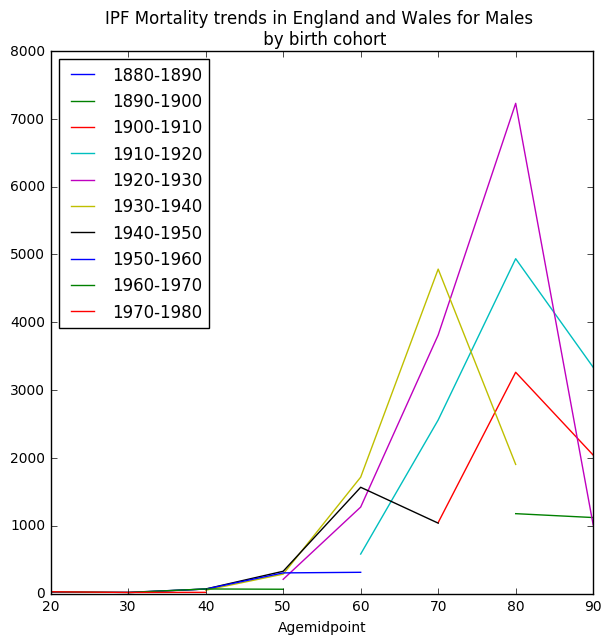

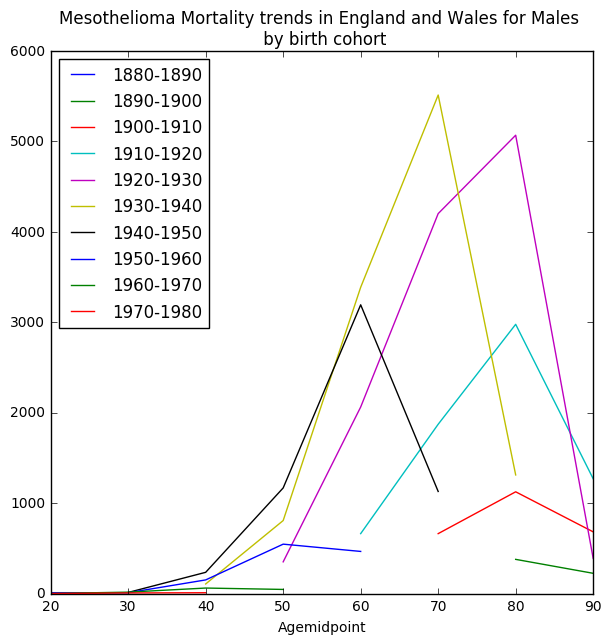

In [107]:
plot_cohort_age(df, mask['male-ipf-cohort'], 'IPF Mortality trends in England and Wales for Males \n by birth cohort')
plot_cohort_age(df, mask['male-meso-cohort'], 'Mesothelioma Mortality trends in England and Wales for Males \n by birth cohort')